In [44]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy
from sklearn.cluster import DBSCAN
from scipy import signal



In [49]:
def call_dbscan(div):
    div[div < 0 ] = 0
    dbscan = DBSCAN(eps=0.6, min_samples=2).fit_predict(div.reshape(-1,1))
    dbscan[dbscan != 0] = 1
    plt.scatter(np.arange(len(div)), div, c=[dbscan], cmap='coolwarm')
    plt.show()
    
    # arg_dbscan = np.where(dbscan == 1)
    # plt.scatter(arg_dbscan, div[arg_dbscan], c='red')
    # plt.show()
    

data/csv\data_cir_reflection3_1.csv
(23521,)


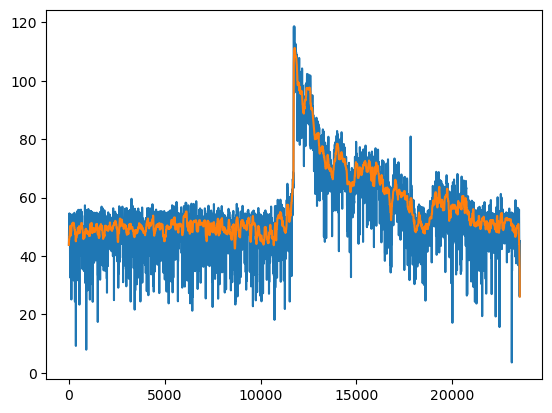

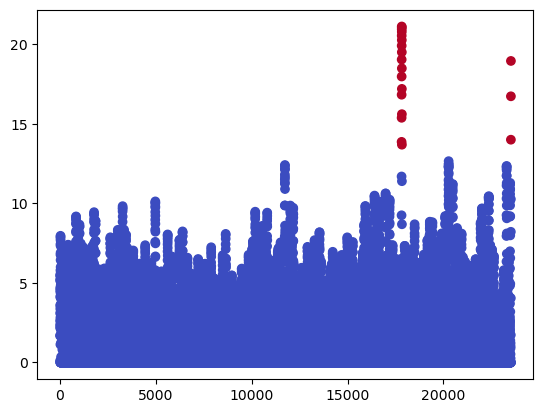

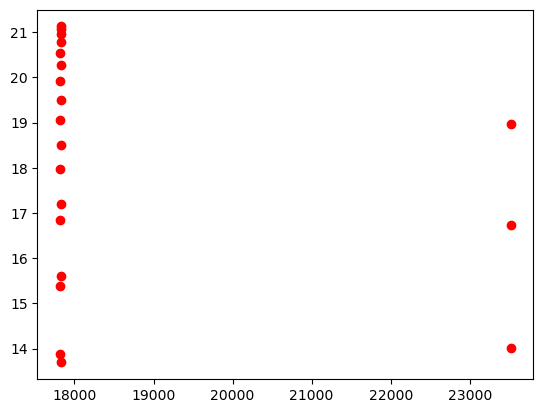

data/csv\data_cir_reflection3_2.csv
(23521,)


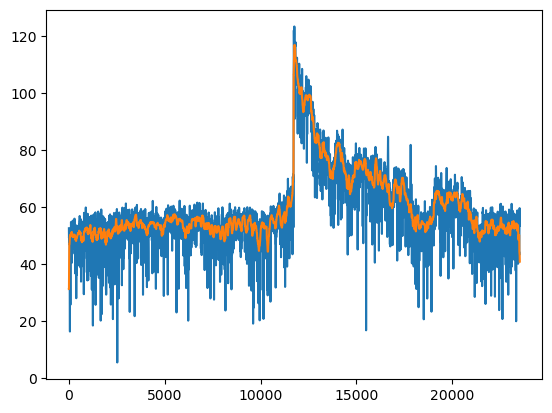

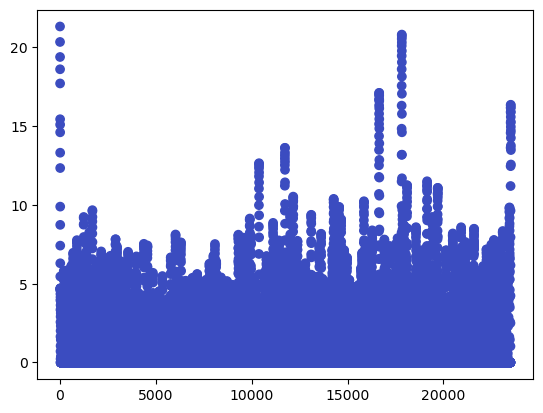

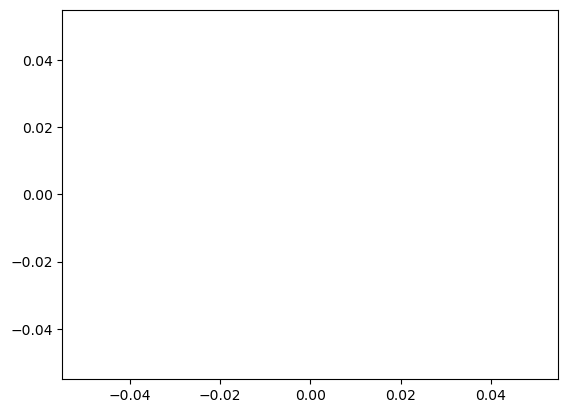

data/csv\data_cir_reflection3_3.csv
(23521,)


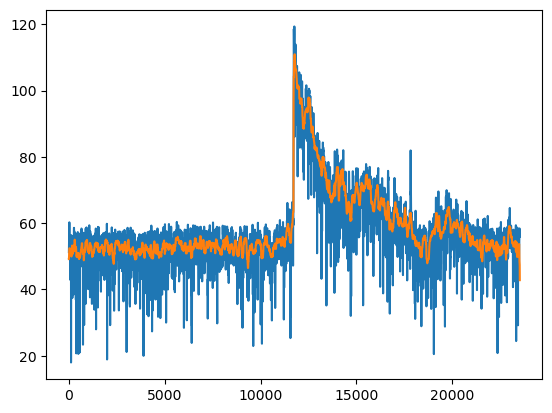

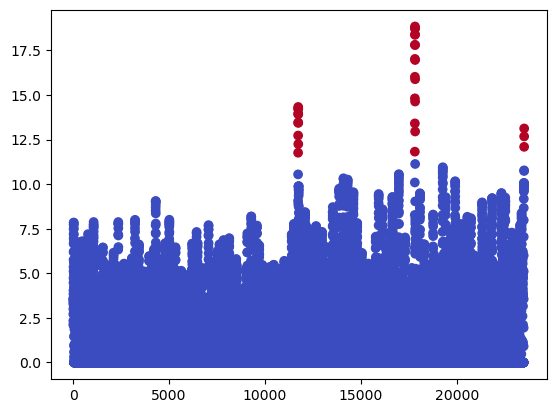

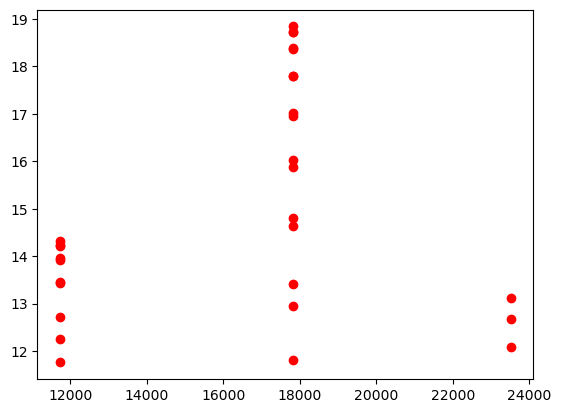

data/csv\data_cir_reflection3_4.csv
(23521,)


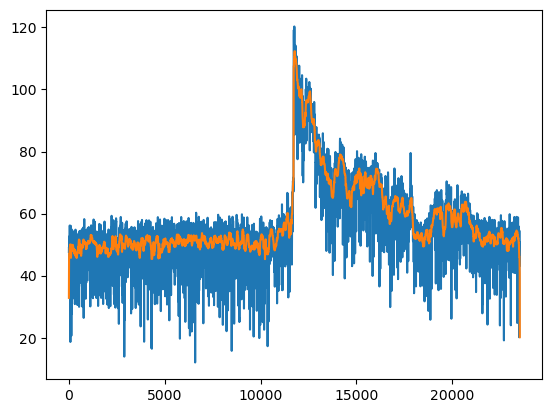

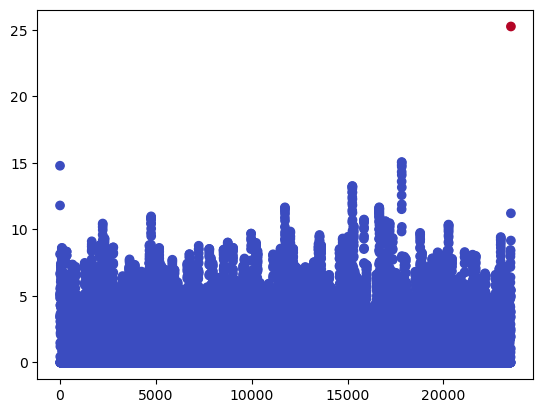

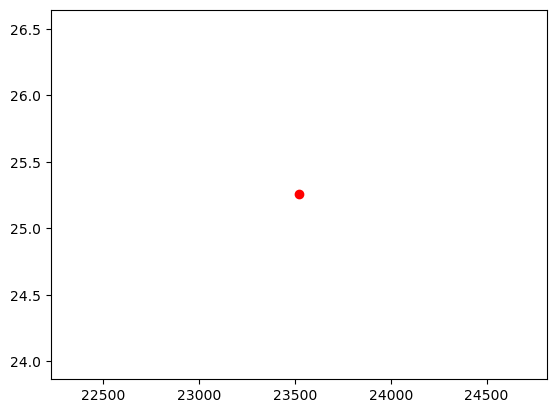

data/csv\data_cir_reflection3_5.csv
(23521,)


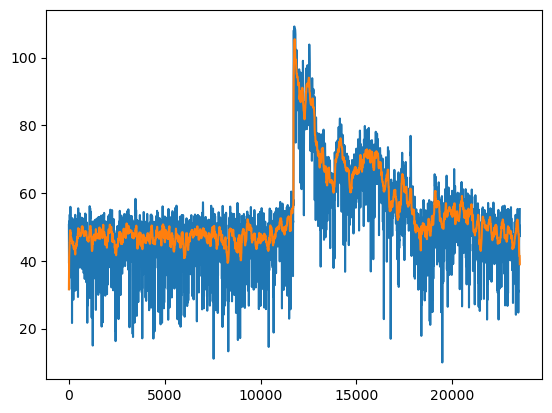

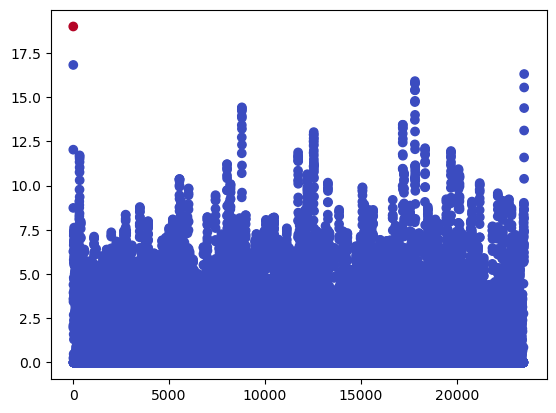

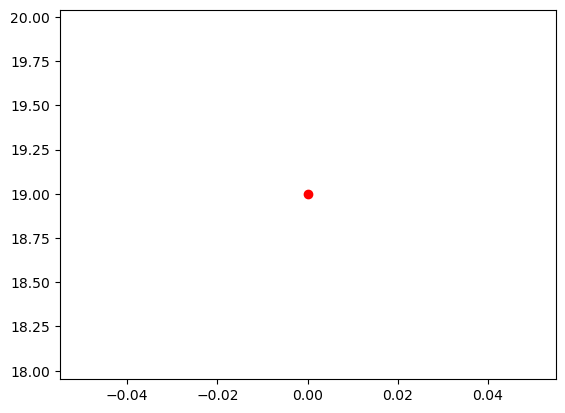

data/csv\data_cir_reflection3_6.csv
(23521,)


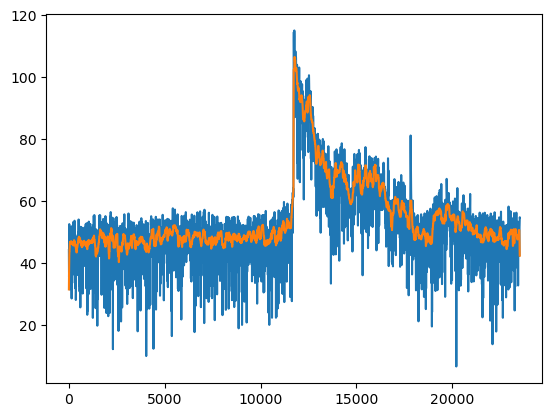

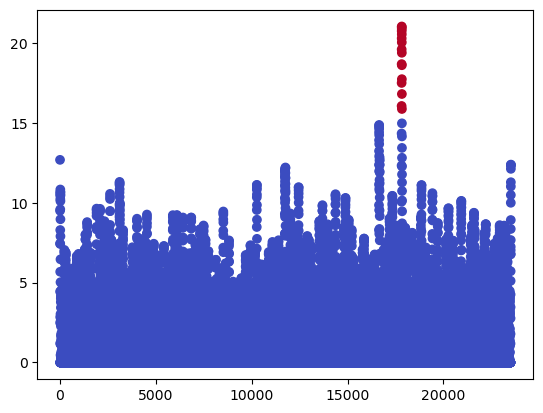

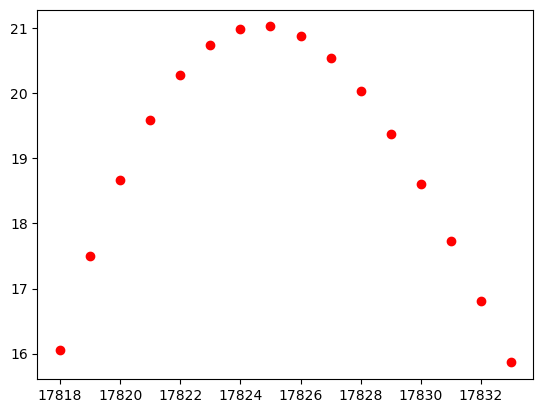

data/csv\data_cir_serlich3_17.csv
(23521,)


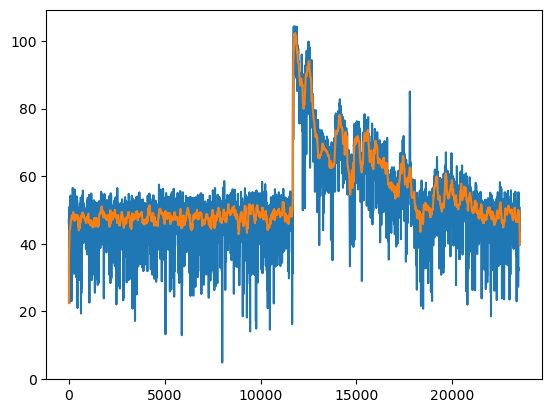

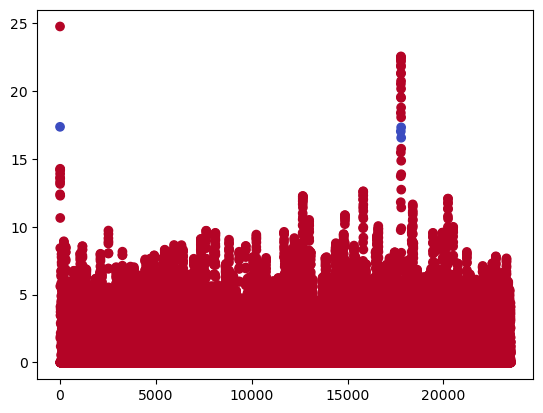

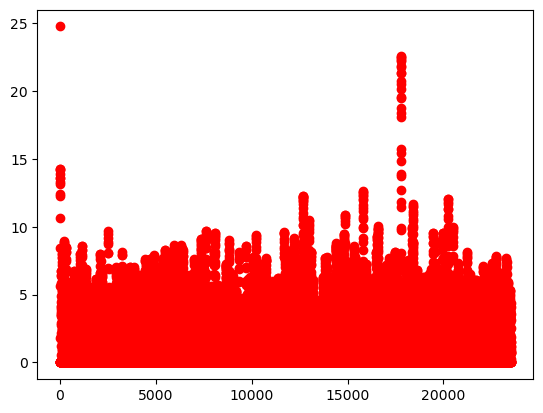

data/csv\data_cir_serlich3_25.csv
(23521,)


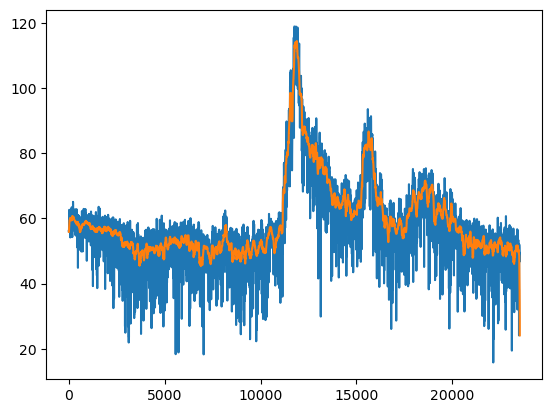

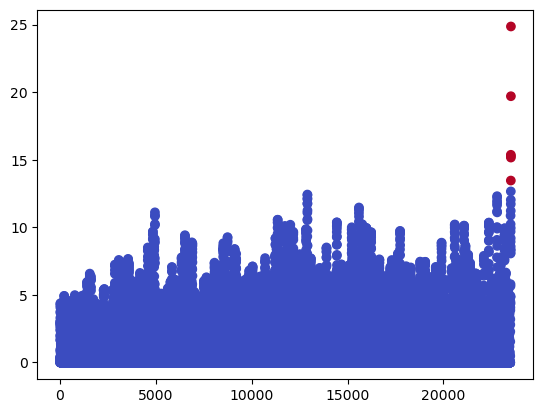

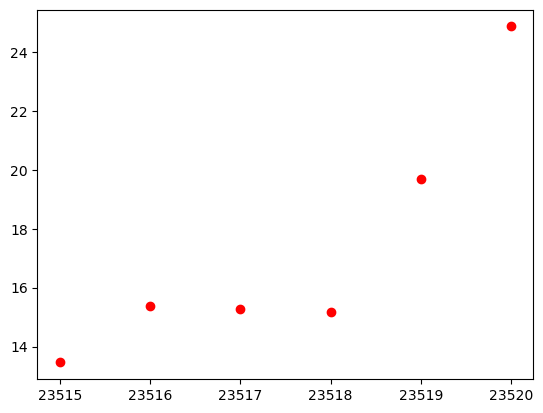

data/csv\data_cir_serlich3_36.csv
(23521,)


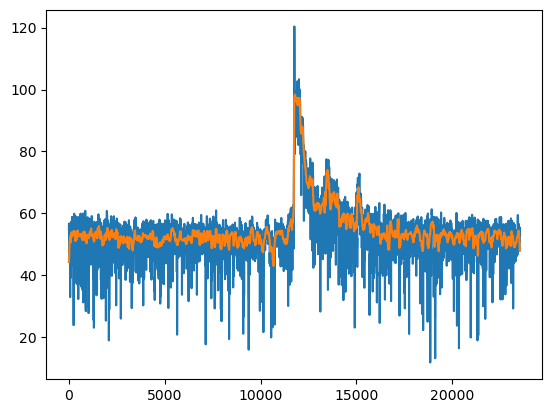

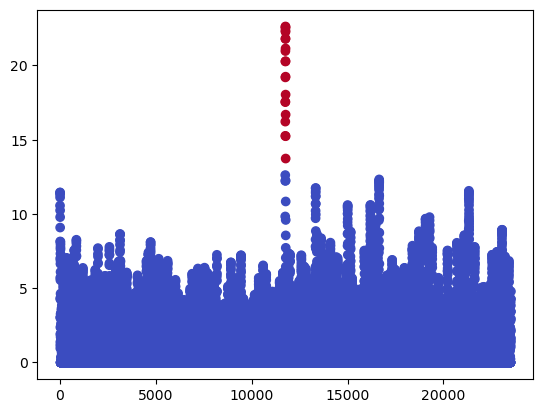

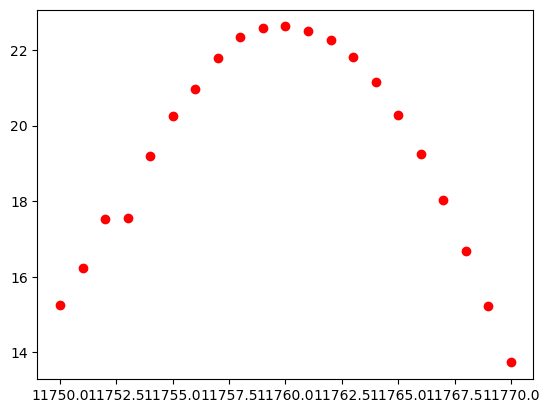

data/csv\masaryk100.csv
(23521,)


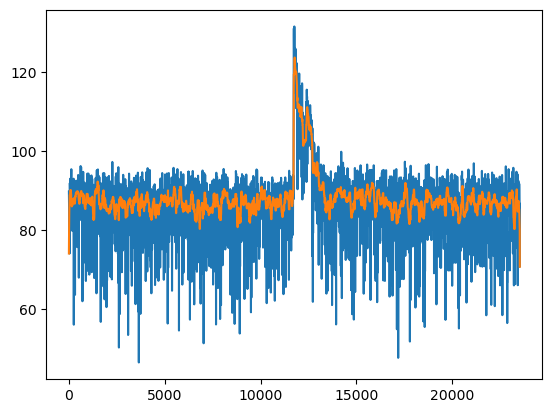

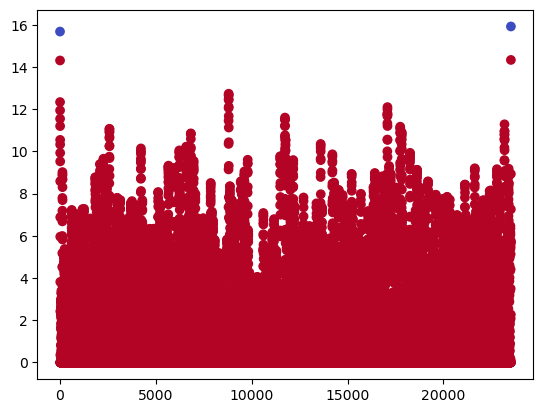

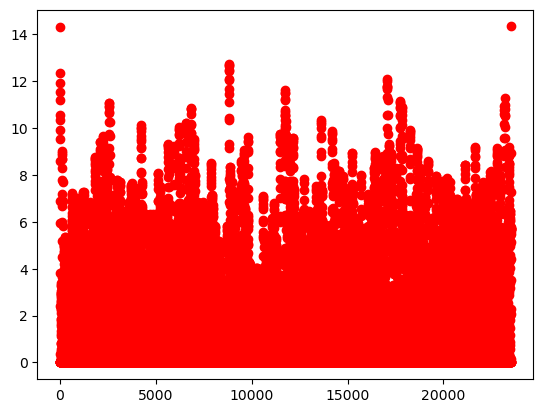

In [50]:
skip_samples=0
dataset = np.array([])
for file in sorted(glob.glob('data/csv/*')):
    print(file)
    data = np.loadtxt(file, delimiter=',')
    complex_data = np.vectorize(complex)(data[skip_samples:, 0], data[skip_samples:, 1])
    data = 20 * np.log10(abs(complex_data)) + 150
    print(np.shape(data))
    filtered_data = signal.medfilt(data, 105)
    
    plt.plot(data)
    plt.plot(filtered_data)
    plt.show()
    
    div = data-filtered_data
    call_dbscan(div)

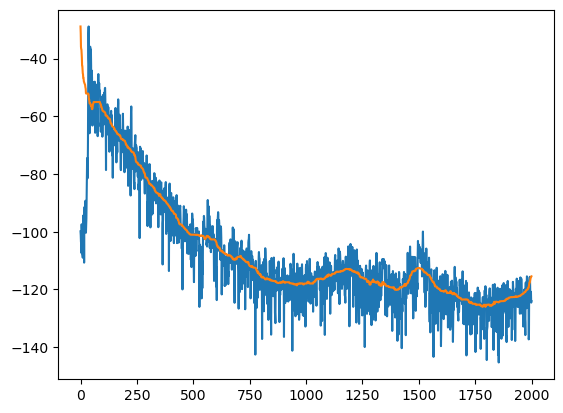

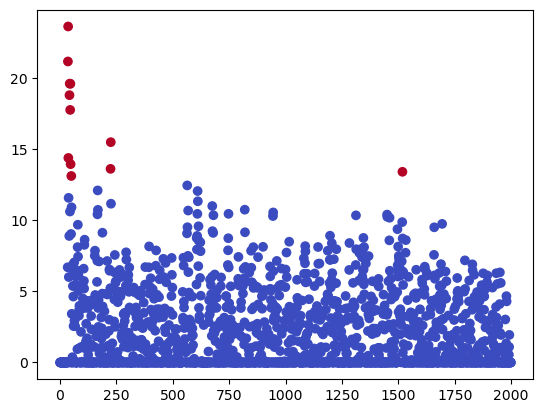

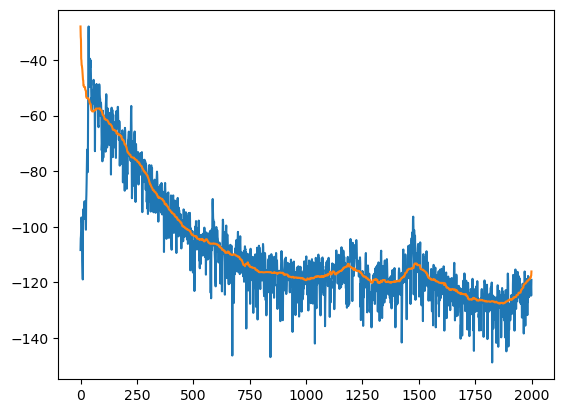

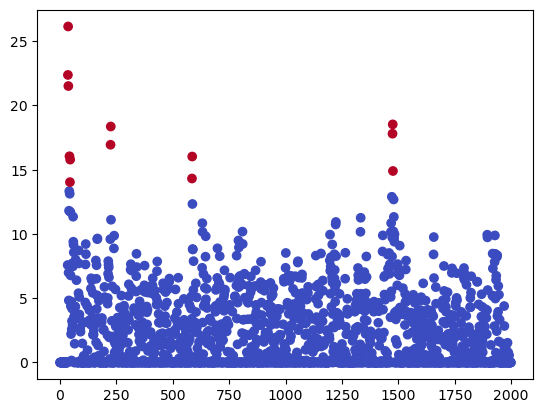

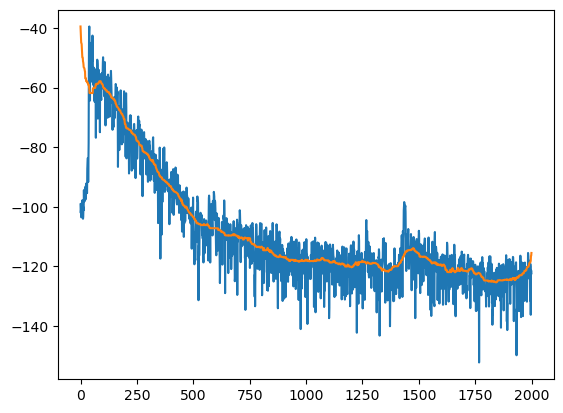

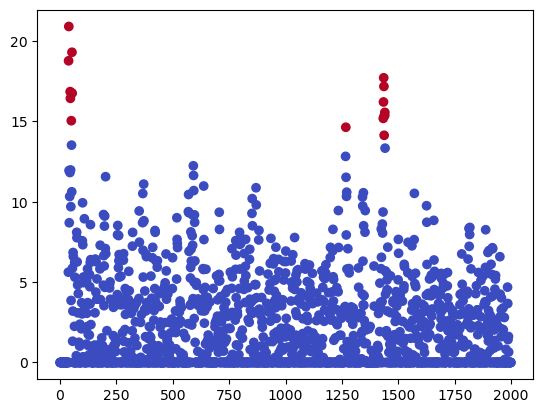

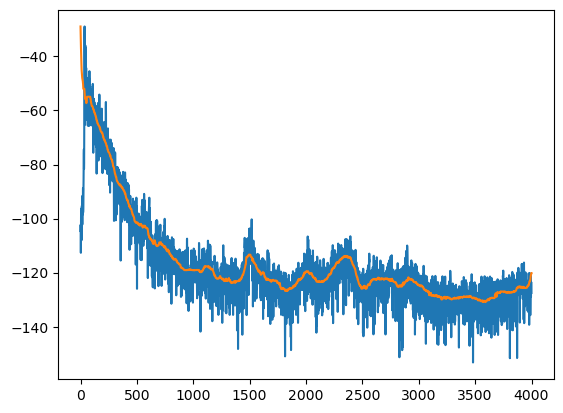

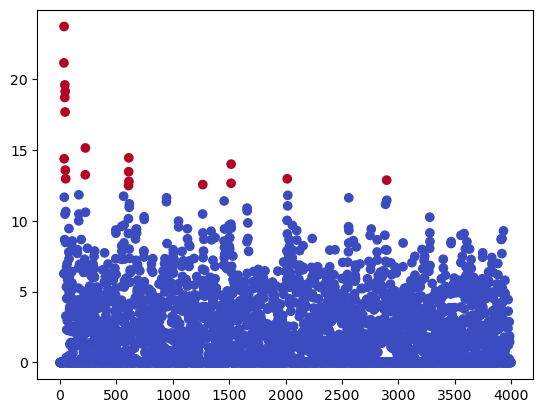

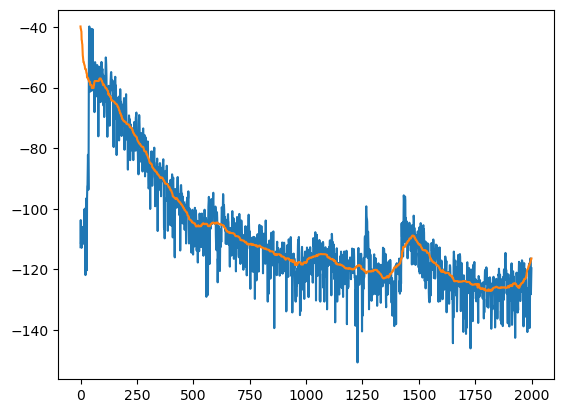

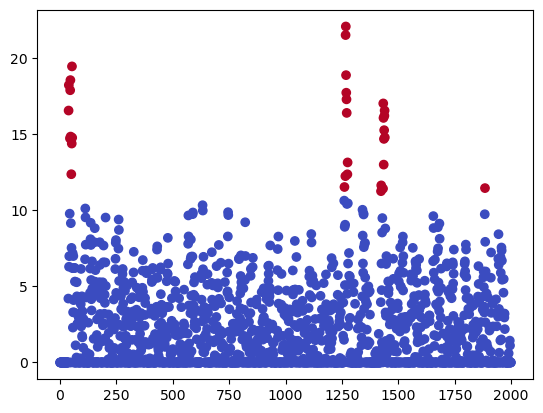

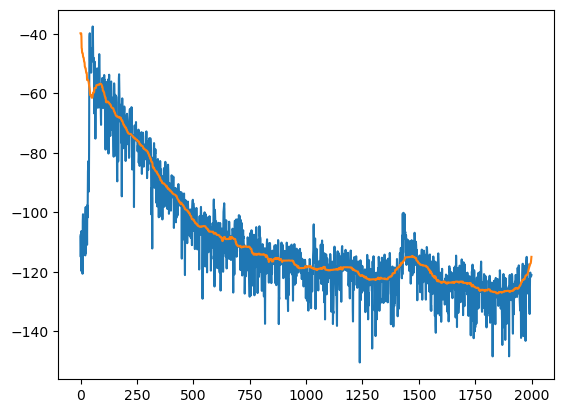

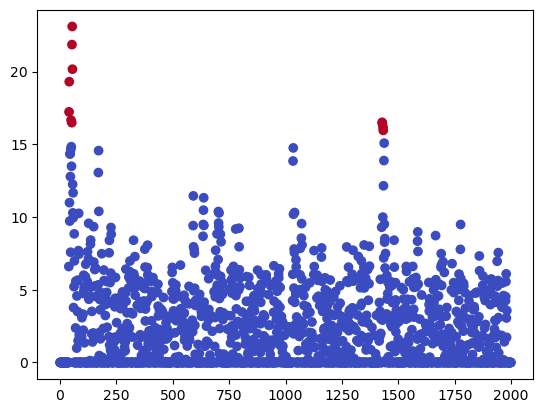

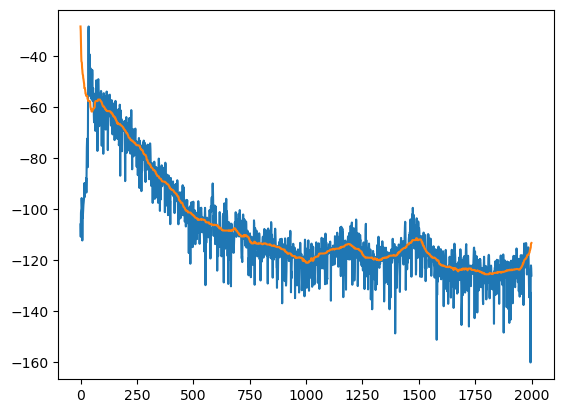

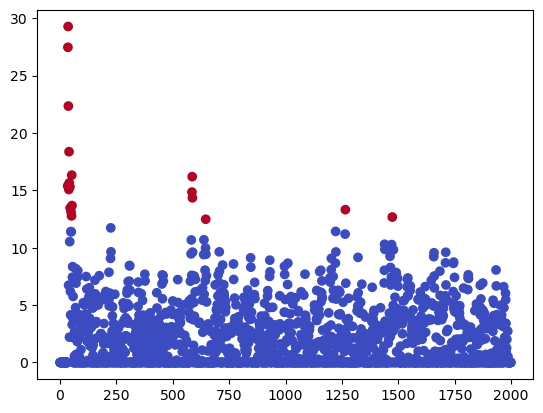

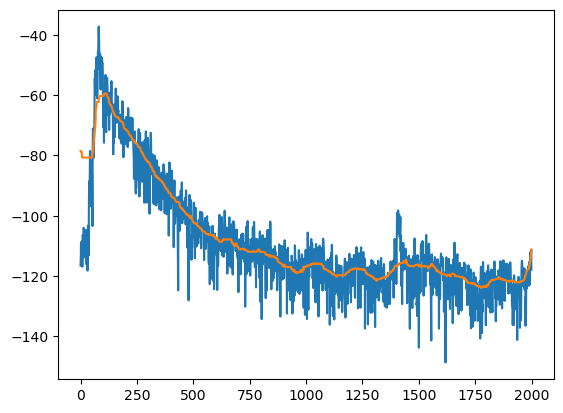

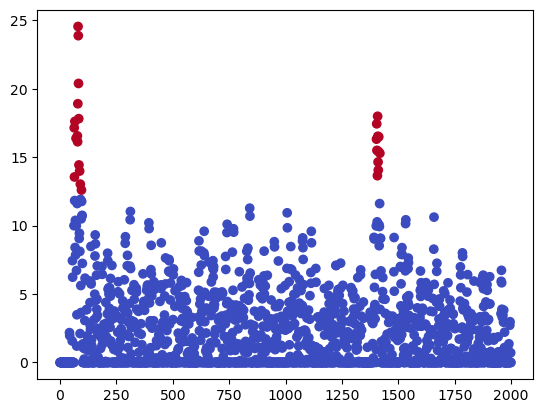

In [47]:
dataset = np.array([])
for file in sorted(glob.glob('data/matlab/*')):
    file_name = file.split("\\")[1]
    data = scipy.io.loadmat(file)[file_name[:-4]]
    data = data.flatten()
    filtered_data = signal.medfilt(data, 105)
    
    plt.plot(data)
    plt.plot(filtered_data)
    plt.show()
    
    div = data-filtered_data
    call_dbscan(div)

array([-116.52067272, -114.67822486, -109.64810271, ..., -114.02351733,
       -111.23697007, -117.86336913])